import pandas library

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import LineString, Point, Polygon

In [26]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

load the csv file into a DataFrame

In [3]:
df = pd.read_csv('listings.csv')

display the graph of distribution of property types

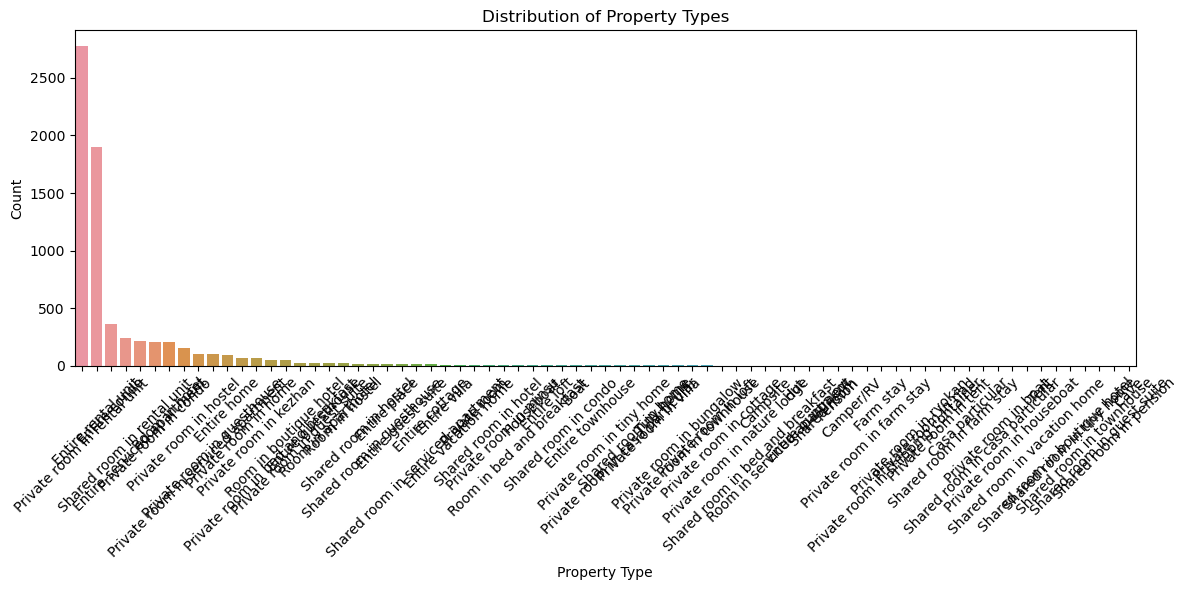

In [4]:
# Distribution of property types
plt.figure(figsize=(12, 6))
sns.countplot(x='property_type', data=df, order=df['property_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


display the graph of distribution of room types

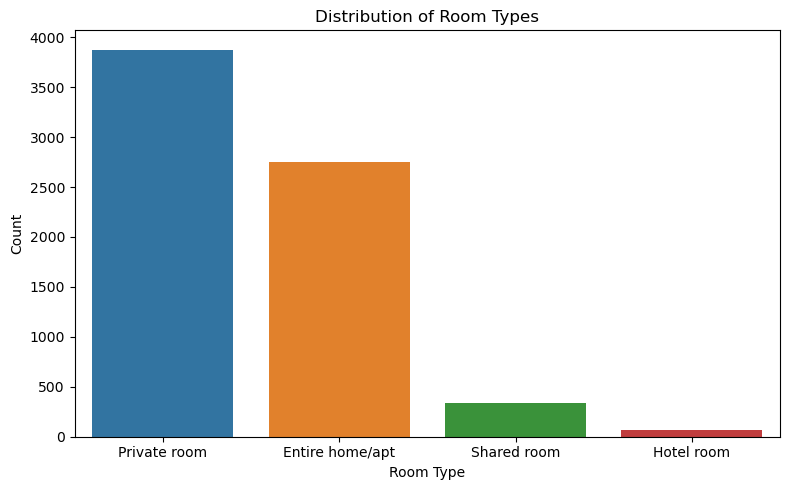

In [5]:
# Distribution of room types
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

display the Scatter plot of price vs number of reviews

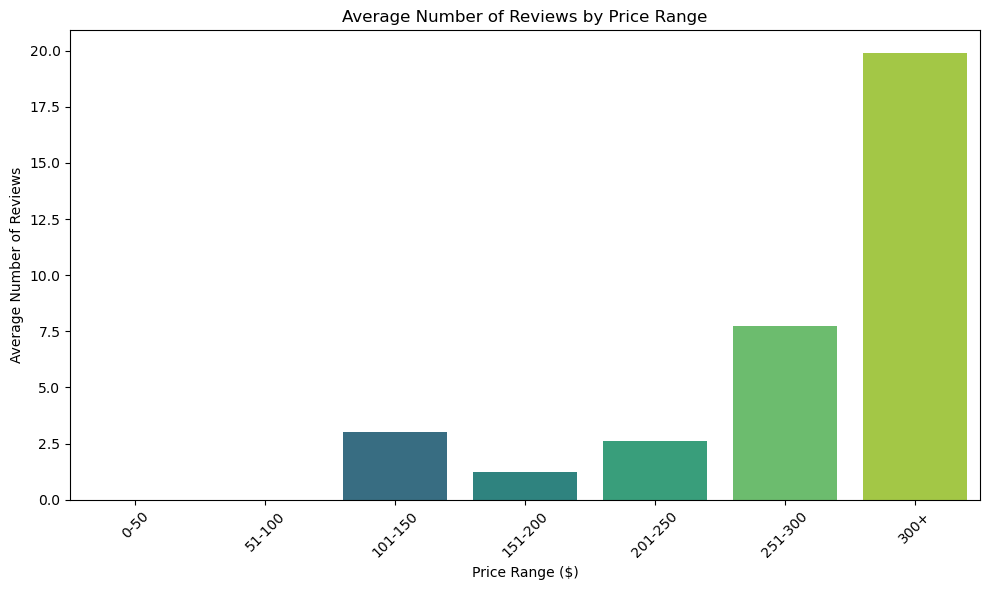

In [6]:
# Scatter plot of price vs number of reviews
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Define price ranges
price_bins = [0, 50, 100, 150, 200, 250, 300, np.inf]
price_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '300+']

# Assign each row to a price range
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

# Calculate average number of reviews for each price range
average_reviews_by_price = df.groupby('price_range')['number_of_reviews'].mean().reset_index()

# Plot bar chart for average number of reviews by price range
plt.figure(figsize=(10, 6))
sns.barplot(x='price_range', y='number_of_reviews', data=average_reviews_by_price, palette='viridis')
plt.title('Average Number of Reviews by Price Range')
plt.xlabel('Price Range ($)')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Create a map of city 

In [30]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [41]:
m_1 = folium.Map(location=[22.286394,114.149139], tiles='cartodbpositron', zoom_start=10)

def popup_data(row):
    return f"""
    <h3> {row['name']}</h3><br>
    price = {row['price']}$
    <p>
    </p>
    """



mc = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker(location=[row['latitude'], row['longitude']],
                            popup=popup_data(row),lazy=True))

m_1.add_child(mc)

m_1

In [147]:
districts_full = gpd.read_file('./hksar_18_district_boundary.json')
districts = districts_full[["District", "geometry"]]
districts

District                                           geometry
0   Central & Western  POLYGON ((114.14951 22.29748, 114.10987 22.297...
1            Wan Chai  POLYGON ((114.19771 22.25790, 114.19778 22.258...
2             Eastern  POLYGON ((114.21939 22.29568, 114.21087 22.300...
3            Southern  POLYGON ((114.16338 22.25882, 114.16305 22.258...
4       Yau Tsim Mong  POLYGON ((114.17448 22.32665, 114.17417 22.326...
5        Sham Shui Po  POLYGON ((114.17273 22.34646, 114.17258 22.346...
6        Kowloon City  POLYGON ((114.17946 22.34902, 114.17900 22.349...
7        Wong Tai Sin  POLYGON ((114.22403 22.33452, 114.22112 22.353...
8           Kwun Tong  POLYGON ((114.22403 22.33452, 114.22397 22.334...
9           Tsuen Wan  POLYGON ((114.16919 22.41293, 114.16148 22.413...
10           Tuen Mun  POLYGON ((114.06597 22.39181, 114.06581 22.397...
11          Yuen Long  POLYGON ((114.12790 22.46651, 114.12657 22.466...
12              North  POLYGON ((114.33619 22.56813, 114.33296 22.568...
13             Tai Po  POLYGON ((114.45606 22.46623, 114.45492 22.468...
14           Sai Kung  POLYGON ((114.30925 22.14848, 114.50246 22.148...
15            Sha Tin  POLYGON ((114.25245 22.39360, 114.25246 22.394...
16         Kwai Tsing  POLYGON ((114.14901 22.38028, 114.14753 22.378...
17            Islands  POLYGON ((114.07270 22.31253, 114.01046 22.313...

In [106]:
m_2 = folium.Map(location=[22.286394,114.149139], tiles='cartodbpositron', zoom_start=10)


popup = folium.GeoJsonPopup(fields=["District"])
folium.GeoJson(
    districts,
    highlight_function=lambda feature: {
        "fillColor": "green"
    },
    popup=popup,
    popup_keep_highlighted=True,
    zoom_on_click=True
).add_to(m_2)



m_2

Notatka dla ciebie Kuba jak bedziesz chcial sie za to brac ponizej jest kod ktory przydziela dane z CSV do danego dystryktu na razie na stale jest wartość "Yuen Long" i z tych danych zrobic jednorzedowa tabele z danymi ktore chcemy zeby sie wyswietlaly po kliknieciu w dany dystrykt tak jak na mapie powyżej wiec potrzebne jest zebys znalazl te dane i potem polaczyc to z df "districts" ktory jest powyzej tak zeby kazda dzielnica miala dane warotsci i wyswietlic to tak jak jest powyzej tylko najlepiej przy klikaniu w wybrany kafelk wyswietla sie pop ut nie tylko z nazwa ale z zajebistymi danymi wykresami itp jak bedziesz mial czas to sie tym pobaw jezeli nie to dokończe to jak wrbede w domu  ty zajmij sie czym innym jak masz pomysł buizaczki i miłego kodowania :*

data allocation to difrent district  

In [179]:
def point_inside_any_polygon(row, district_name):
    point = Point(row['longitude'], row['latitude'])
    polygons = districts["geometry"][districts["District"] == district_name]
    for polygon in polygons:
        if polygon.contains(point):
            return True
    return False

def district_data(district_name):
    asdas = df.apply(point_inside_any_polygon, args=(district_name,), axis=1)
    points_inside_any_polygon = df[asdas]
    return points_inside_any_polygon

district_name = "Yuen Long"
# dfd = district_full_data
dfd = district_data(district_name)
dfd.dropna(subset=['price'], inplace=True)
dfd = dfd[dfd['price'] != 0]

integer_rows = dfd.select_dtypes(include=['int',"float"])
integer_rows_data = dfd[integer_rows.columns.tolist()]
# ddmv = district_data_mean_value
ddmv = integer_rows_data.mean()
ddmv

C:\Users\Kajtek\AppData\Local\Temp\ipykernel_10208\1623014989.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.dropna(subset=['price'], inplace=True)


id                                              4.989235e+17
scrape_id                                       2.023122e+13
description                                              NaN
host_id                                         2.918505e+08
host_listings_count                             4.510638e+00
host_total_listings_count                       6.872340e+00
neighbourhood_group_cleansed                             NaN
latitude                                        2.244836e+01
longitude                                       1.140369e+02
accommodates                                    3.340426e+00
bathrooms                                                NaN
bedrooms                                                 NaN
beds                                            2.085106e+00
price                                           1.290979e+03
minimum_nights                                  2.738298e+01
maximum_nights                                  5.559149e+02
minimum_minimum_nights  

In [122]:
# def popup_data(row):
#     return f"""
#     <h3> {row['name']}</h3><br>
#     price = {row['price']}$
#     <p>
#     </p>
#     """

# mc = MarkerCluster()
# for idx, row in points_inside_any_polygon.iterrows():
#     if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
#         mc.add_child(Marker(location=[row['latitude'], row['longitude']],
#                             popup=popup_data(row),lazy=True))

# m_2.add_child(mc)

# m_2